bike sharing demand
kaggle : https://www.kaggle.com/c/bike-sharing-demand/submissions

In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [649]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [650]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [651]:
test.columns #casual registered count 없음 // casual + registered = count

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [652]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [653]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [654]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [655]:
train['datetime'].astype

<bound method NDFrame.astype of 0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object>

In [656]:
#object -> datetime
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [657]:
train['datetime'].astype 

<bound method NDFrame.astype of 0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]>

In [658]:
train['year'] = train['datetime'].dt.year #4자리
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek


<AxesSubplot:xlabel='year', ylabel='count'>

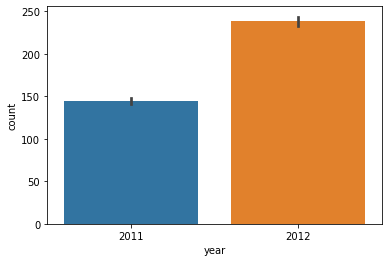

In [659]:
sns.barplot(data = train, x = 'year', y= 'count')


# 2011 -> 2012 증가

<AxesSubplot:xlabel='month', ylabel='count'>

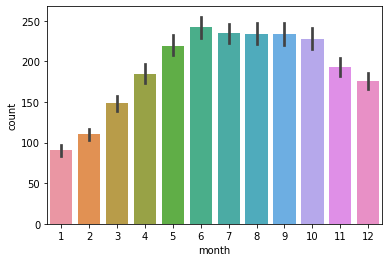

In [660]:
sns.barplot(data = train, x = 'month', y= 'count')

# 678 높 123 낮 더을때 높고 추울때 낮다

<AxesSubplot:xlabel='day', ylabel='count'>

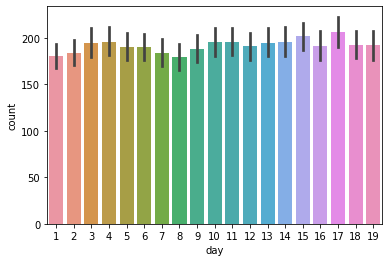

In [661]:
sns.barplot(data = train, x = 'day', y= 'count')

# 골고루 있음 day 마다 변동이 있긴 함

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


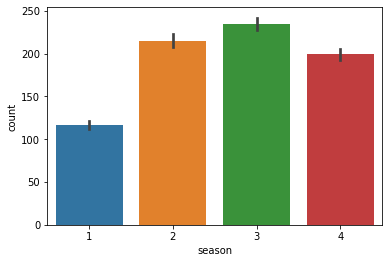

In [662]:
sns.barplot(data = train, x = 'season', y= 'count')

# 1234가 뭔디 봄엶갈결
print(train[train['season'] == 1].month.unique()) #123
print(train[train['season'] == 2].month.unique()) #456
print(train[train['season'] == 3].month.unique()) #789
print(train[train['season'] == 4].month.unique()) #101112

#unique 유일한 값 찾기 pd.Searies.unique
# https://rfriend.tistory.com/267


<AxesSubplot:xlabel='hour', ylabel='count'>

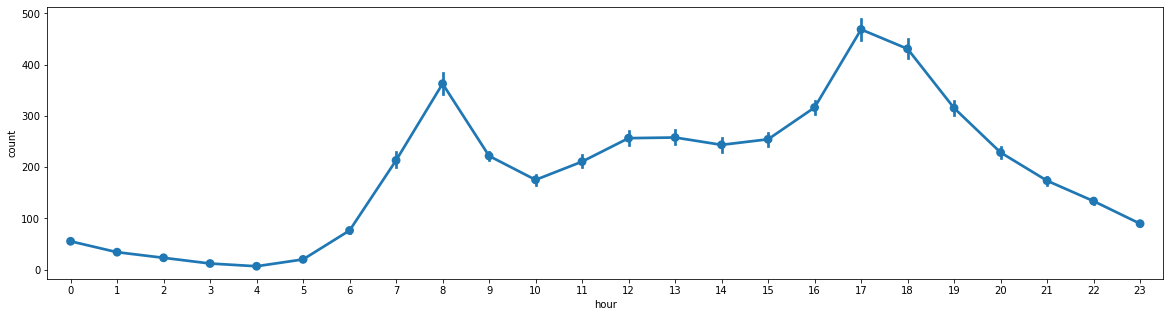

In [663]:
# 시간_참고한 부분 에러 때문에 코드 수정함 subplots subplot 때문이었음

plt.figure(figsize = (20,5)) #크기
ax1 = plt.subplot(1,1,1) # 1행 1열 1번 axes

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

# 789 161718시에 수요량 높음 -> 출퇴근/등하교 시간

<AxesSubplot:xlabel='hour', ylabel='count'>

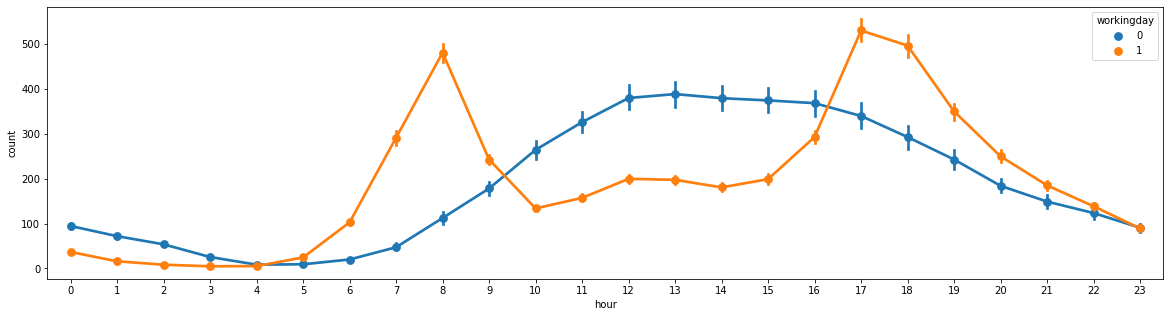

In [664]:
#working day 근무일1 그 외0-> 01로 나뉨 hue 사용 categorical
plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,1,1)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

# workingday 에서는 출퇴근 시간에 수요량 높음
# 아닌날은 낮시간에 더 많음
# not working + holiday 있을 수 있음 공휴일 쉬는날 겹침
# holiday workingday 그래프가 정확히 겹치지 않음

<AxesSubplot:xlabel='hour', ylabel='count'>

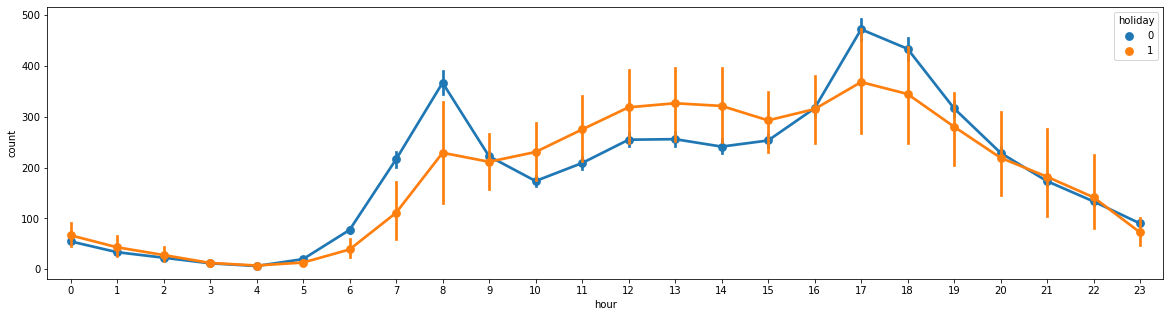

In [665]:
# holiday
plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,1,1)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax1)

# holiday 일때는 낮시간떄 높음 아닐때는 출퇴근 시간 


<AxesSubplot:xlabel='hour', ylabel='count'>

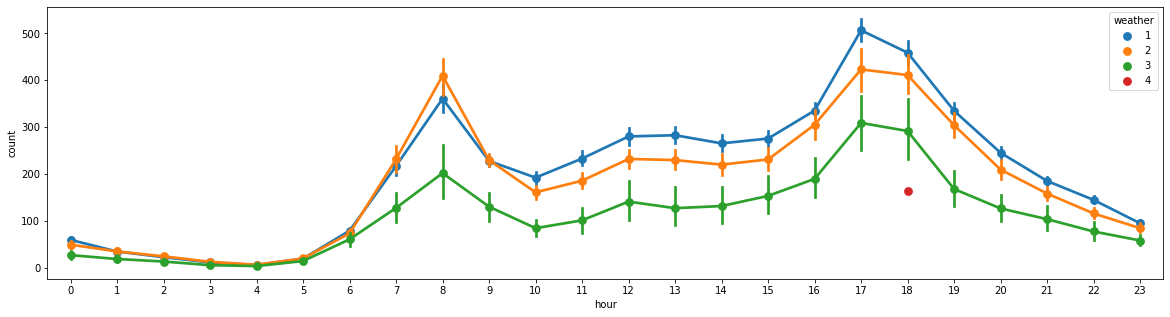

In [666]:
# weather
# 아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박(4)

plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,1,1)

sns.pointplot(data = train, x = 'hour', y = 'count', hue ='weather', ax = ax1)

# 출근은 비가오나 하지..
# 12 > 3 > 4(데이터 거의 없음)

<AxesSubplot:xlabel='hour', ylabel='count'>

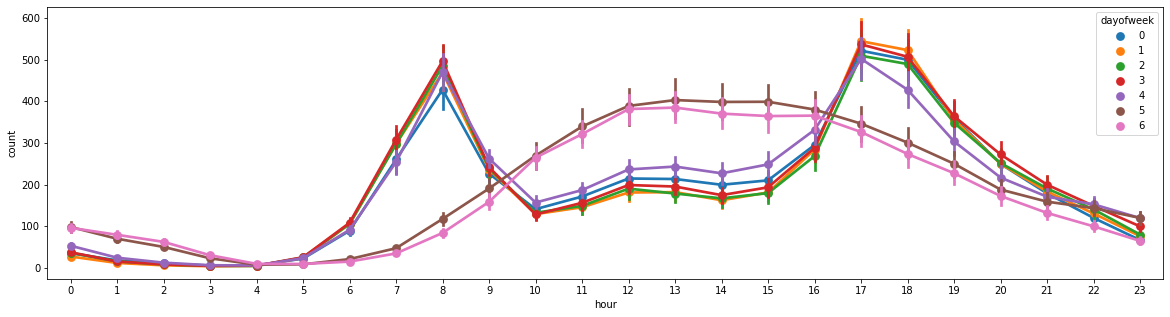

In [667]:
# dayofweek

plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,1,1)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax1)


# day 출퇴근 weekend 오후 시간대

<AxesSubplot:>

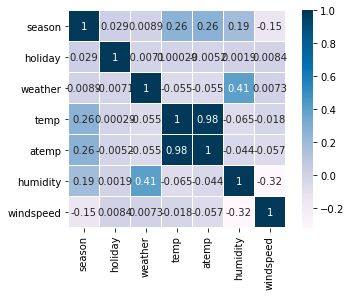

In [668]:
corr_data = train[['datetime', 'season', 'holiday', 'weather','temp','atemp'
             ,'humidity', 'windspeed']]
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(),
           linewidths = 0.1,
           square = True,
           annot = True, #값
           cmap = colormap)

# temp atemp 비슷함 하나로 처리 가능
# 다중공선성 의심

<AxesSubplot:xlabel='atemp', ylabel='count'>

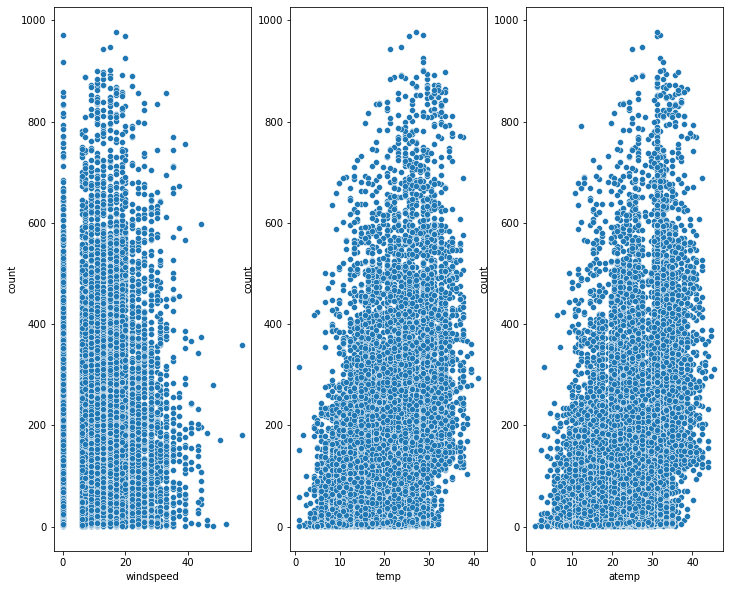

In [669]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize = (12,10))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax =ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax =ax2)
sns.scatterplot(data = train, x = 'atemp', y = 'count', ax =ax3)


In [670]:
# windspeed가 0일 경우에 몰려있음 몇개? 1313/10000
# 이상한것 몰랐는데 바람의 세기가 0인경우는 많이 존재하지 않음 -> null 0에다 넣음

len(train[train['windspeed'] == 0])

1313

<AxesSubplot:xlabel='count'>

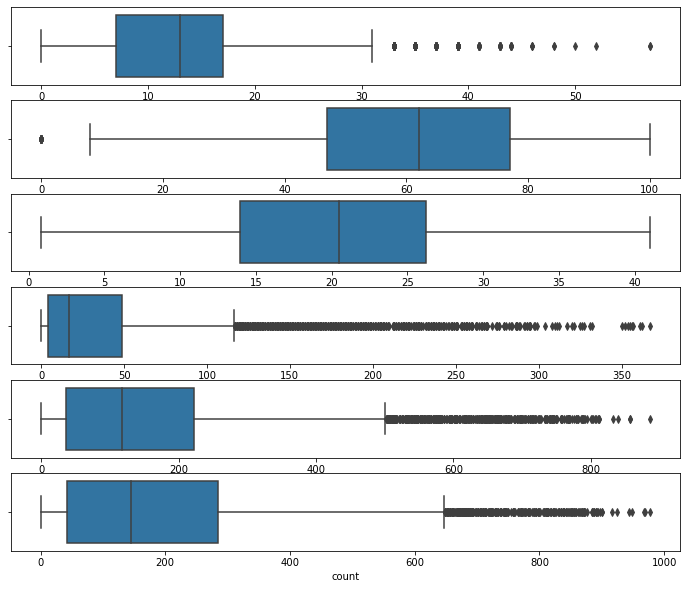

In [671]:
# feature engineering
# 왜도(대칭성이 얼마나 결핍되었는가) 첨도(꼬리/outlier) 없앰 
# 왜도 -2~+2 안이면 적정
# -2 왼쪽으로 쏠림 +2 오른쪽으로 쏠림
# positive일경우 변환방법 : square root, cube, log(밑10)
# negative일경우 변환방법 : square, cube root, logarithmic(밑2인log)

# 첨도 한쪽 꼬리 부분의 극값과 다른쪽 극값의 차이를 보여줌
# 첨도가 높으면 outlier 많다


# IQR방법으로 이상치를 제거

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows = 6, figsize = (12,10))

sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [672]:
#IQR 이상치 제거

from collections import Counter 

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25) #백분위
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index #outlier
        outlier_indices.extend(outlier_list_col) #추가
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

#이상치 제거하고 저장
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [673]:
train.shape

(10886, 19)

In [674]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train.shape

(10846, 19)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness(왜도): 1.210923
kurtosis(첨도): 1.200871


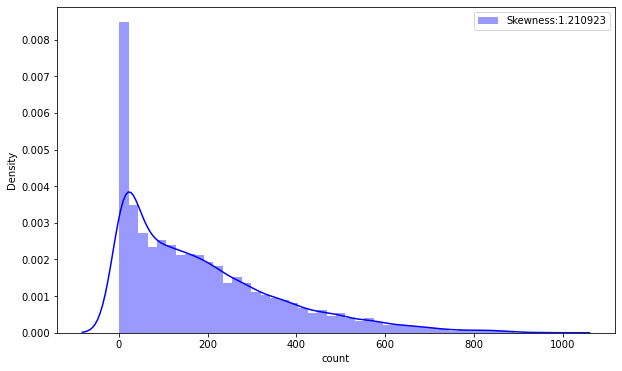

In [675]:
fig, ax = plt.subplots(1,1,figsize = (10,6))

#히스토그램
graph = sns.distplot(train['count'], color = 'b',label = "Skewness:{:2f}".format(train['count'].skew())
                    , ax = ax)
                     
graph = graph.legend(loc = 'best')

print('skewness(왜도): %f' %train['count'].skew())
print('kurtosis(첨도): %f' %train['count'].kurt())

#skewness(왜도): 1.210923
#kurtosis(첨도): 1.200871
#수치상으로는 문제 없음 근디 count 0에 쏠려있음 -> log scaling
#log는 정규성을 높이고 정확한 값을 얻기 위함임


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness(왜도): -0.975198
kurtosis(첨도): 0.247435


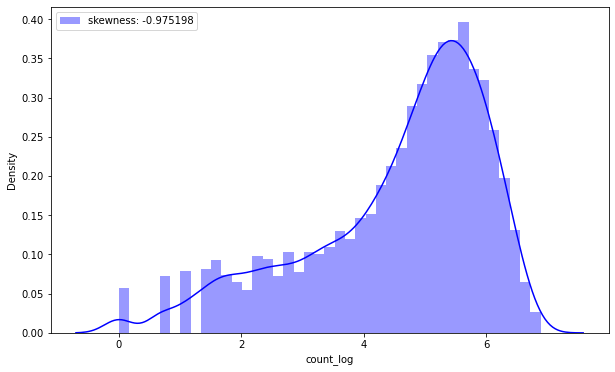

In [676]:
#log 정규화 다시 log 해줘야 원래값 나옴
train['count_log'] = train['count'].map(lambda i: np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1,1,figsize = (10,6))
graph = sns.distplot(train['count_log'], color = 'b', label = 'skewness: {:2f}'.
                    format(train['count_log'].skew()), ax = ax)
graph = graph.legend(loc = 'best')

print("skewness(왜도): %f" %train['count_log'].skew())
print("kurtosis(첨도): %f" %train['count_log'].kurt())

train.drop('count', axis = 1, inplace = True)

In [677]:
# windspeed = 0

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):

    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]
    
    #windspeed ->  날씨 변수
    col = ['season', 'weather', 'temp', 'humidity', 'atemp' ,'day']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    
    # 0이 아닌 컬럼으로 fit    
    rf.fit(windnot0[col], windnot0['windspeed'])
    
    # 0인 부분 pred
    pred_wind0 = rf.predict(X = wind0[col])
    
    #wind0 windspeed 값 -> pred값으로
    wind0['windspeed'] = pred_wind0
    
    #windnot0 wind0 합치기
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data
    

In [678]:
train = predict_windspeed(train)
test = predict_windspeed(test)

<ipython-input-677-16b550d0a1a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
<ipython-input-677-16b550d0a1a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
<ipython-input-677-16b550d0a1a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [679]:
# windspeed 0 있는지 확인 -> 없음
train[train['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,count_log


<AxesSubplot:xlabel='windspeed', ylabel='count'>

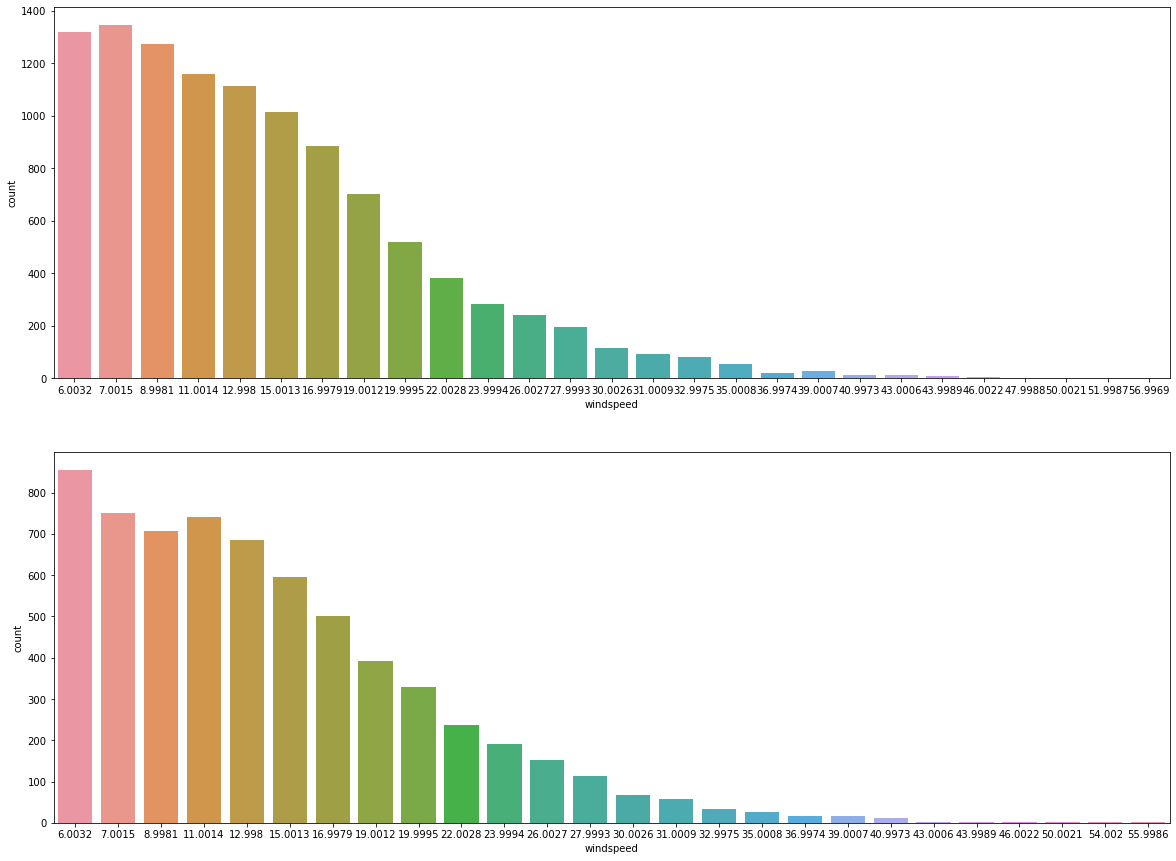

In [680]:
#train과 test의 windspeed 값 시각화
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)

sns.countplot(data = train, x='windspeed', ax = ax1)
sns.countplot(data = test, x = 'windspeed', ax = ax2)

In [681]:
corr_data = train[['count_log','windspeed']]
corr_data.corr()

,count_log,windspeed
count_log,1.000000,0.123215
windspeed,0.123215,1.000000


In [682]:
# one hot encoding season holiday workingday weather
#prefix 란, 변수 생성명 앞에 weather_1 이런식으로 생성되게 하는 것

train= pd.get_dummies(train, columns = ['weather'], prefix = 'weather')
test = pd.get_dummies(test, columns = ['weather'], prefix = 'weather')

train = pd.get_dummies(train, columns = ['season'], prefix = 'season')
test = pd.get_dummies(test, columns = ['season'], prefix = 'season')




In [683]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek', 'count_log', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [684]:
test.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [685]:
#submission -> datetime 기준

test_datetime = test['datetime']

train.drop(['datetime', 'workingday', 'atemp', 'registered', 'casual','minute',
            'second'], axis = 1, inplace = True)

test.drop(['datetime', 'workingday', 'atemp', 'minute', 'second'], axis = 1,
         inplace = True)


In [686]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train = train.drop('count_log', axis =1).values
target_label = train['count_log'].values
x_test = test.values

#.8,.2로 split
x_train,x_val,y_train,y_val = train_test_split(x_train,target_label,test_size = 0.2,
                                              random_state = 2000)


In [687]:
x_train

array([[ 0.  , 32.8 , 49.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 13.12, 45.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  , 26.24, 73.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , 22.96, 37.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  , 18.86, 63.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  , 17.22, 38.  , ...,  0.  ,  0.  ,  0.  ]])

In [688]:
# 앙상블 학습 -> 예측기로부터 예측을 수집하여 하나의 모델을 사용했을 때 보다 더
# 좋은 예측을 얻을 수 있음
# 부스팅은 그 중에 하나 -> 앞의 모델을 보완해나가면서 학습시킴
# gradient니까 오차로 학습이겠지 뭐... -> 맞다
# bias 증가X variance 감소

from sklearn.ensemble import GradientBoostingRegressor #모델


regressor = GradientBoostingRegressor(n_estimators = 2000,
                                     learning_rate = 0.05,
                                     max_depth = 5,
                                     min_samples_leaf = 15,
                                     min_samples_split = 10,
                                     random_state = 42)

regressor.fit(x_train,y_train)




GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [689]:
score_train = regressor.score(x_train,y_train)
score_val = regressor.score(x_val,y_val)


print("train score:",score_train)
print("valid score:", score_val)

train score: 0.9867288054336709
valid score: 0.9529221144868292


In [690]:
pred = regressor.predict(x_test)

In [691]:
sample = pd.read_csv("SampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [692]:
submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count_log'] = pred

#정규화 된거 원래대로
submission['count'] = np.exp(submission['count_log'])

submission.drop('count_log', axis =1, inplace=True)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,14.096598
1,2011-01-20 03:00:00,2.159121
2,2011-01-20 04:00:00,2.236541
3,2011-01-20 05:00:00,6.313793
4,2011-01-20 06:00:00,28.263464


In [693]:
submission.to_csv("Bike2.csv", index= False)

In [585]:
#0.42805
# 참조 https://didu-story.tistory.com/43?category=937100
# https://hong-yp-ml-records.tistory.com/27?category=823206